# Logistic Regression Model
Contributors:

**Egemen Alkan**: Built and evaluated a logistic regression model for survival prediction on the Titanic dataset.
Visualized performance metrics and predictions.
Objective:
Develop a logistic regression model to predict Titanic survival and compare its performance with other models.

Workflow Summary:

Data Preparation:
Encoded categorical variables and handled missing data.
Model Training and Evaluation:
Trained a logistic regression model using scikit-learn.
Evaluated performance using classification metrics like precision, recall, F1-score, and accuracy.
Visualization:
Visualized survival probabilities and key performance metrics using bar charts.

## Logistic Regression on Titanic Dataset

**1. Import Necessary Libraries**

- Import required libraries for data manipulation (pandas), model training (LogisticRegression), evaluation (classification_report), and visualization (matplotlib).



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

**2. Load and Preprocess the Dataset**

2.1 Load the Dataset

- Load the cleaned Titanic dataset into a pandas DataFrame.

In [2]:
titanic_df = pd.read_csv('../data/titanic_cleaned.csv')



2.2 Remove Duplicates

- Remove any duplicate rows to ensure clean data for training.

In [3]:
titanic_df = titanic_df.drop_duplicates()

**2.3 Preprocess the Data**

- Drop irrelevant columns (passengerid).
- Encode categorical variables (sex and embarked) into numeric values.

In [4]:
titanic_df = titanic_df.drop(columns=['passengerid'])  # Drop irrelevant column
titanic_df['sex'] = titanic_df['sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

**3. Define Features (X) and Target (y)**

- X contains the features (independent variables), while y is the target variable (survived).

In [5]:
X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

**4. Split Data into Training and Test Sets**

- Split the dataset into training (80%) and test sets (20%) to evaluate model performance.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Initialize and Train Logistic Regression**

5.1 Initialize Logistic Regression

- Initialize the logistic regression model with:
    - max_iter=1000: Maximum iterations to ensure convergence.
    - C=0.1: Regularization strength (smaller values increase regularization).

In [7]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000, C=0.1)

**5.2 Cross-Validation**

- Perform 5-fold cross-validation to evaluate the model's performance on the training set.
- Print individual and average cross-validation scores.

In [8]:
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print("Logistic Regression CV Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Logistic Regression CV Scores: [0.81818182 0.79545455 0.84848485 0.75757576 0.79545455]
Average CV Score: 0.8030303030303031


**5.3 Train the Model**

- Fit the logistic regression model on the training data.

In [9]:
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

**6. Evaluate Model Performance**

- Predict the target variable on the test data.
- Print a classification report, including:
    - Precision, recall, F1-score, and support for each class.
    - Overall accuracy and weighted/macro averages.

In [10]:
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Model Performance:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Model Performance:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.80      0.73      0.76        66

    accuracy                           0.82       165
   macro avg       0.81      0.80      0.81       165
weighted avg       0.82      0.82      0.82       165



**7. Predict Survival Probabilities for Specific Groups**

7.1 Define Example Groups

- Create a DataFrame of hypothetical passenger groups.

In [11]:
example_groups = pd.DataFrame({
    'sex': [0, 1, 0, 1],  # Female, Male, Female, Male
    'age': [25, 30, 8, 10],  # Adult, Adult, Child, Child
    'pclass': [1, 3, 1, 3],  # First-class, Third-class, First-class, Third-class
    'sibsp': [0, 1, 0, 1],  # Siblings/Spouse
    'parch': [0, 0, 1, 1],  # Parents/Children
    'fare': [80, 15, 100, 10],  # Approximate fares
    'embarked': [0, 2, 0, 2]  # Embarked from C, S, C, S
})

7.2 Align Feature Names

- Ensure the example group features match the original training dataset features.

In [12]:
example_groups = example_groups[X.columns]

7.3 Add Group Labels

- Add a descriptive Group column for each row.

In [13]:
example_groups['Group'] = example_groups.apply(
    lambda row: f"Sex: {row['sex']}, Age: {row['age']}, Pclass: {row['pclass']}", axis=1
)

example_groups['Survival Probability'] = logreg_model.predict_proba(example_groups[X.columns])[:, 1]

7.5 Visualize Survival Probabilities

- Plot a bar chart of survival probabilities for the defined groups.

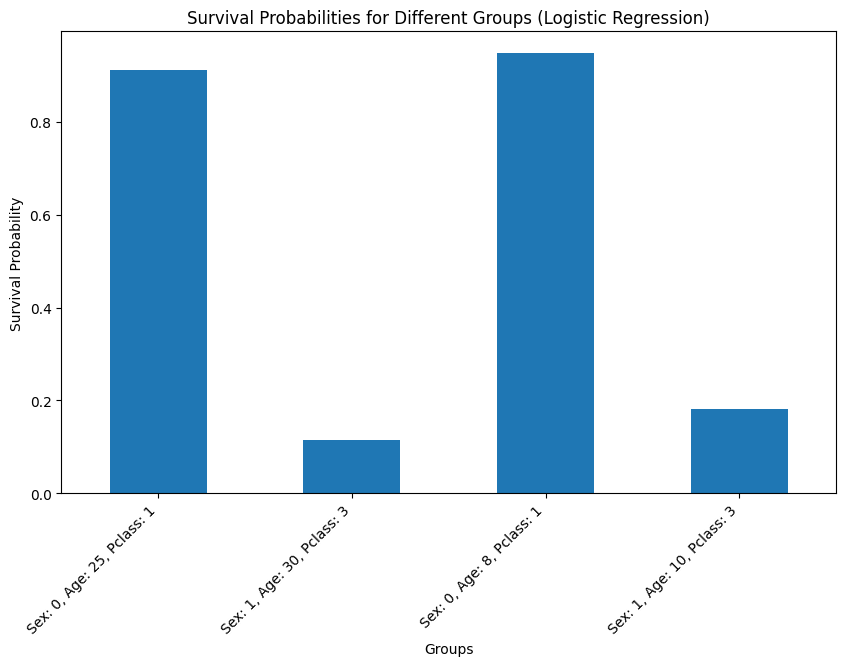

                        Group  Survival Probability
0  Sex: 0, Age: 25, Pclass: 1              0.912198
1  Sex: 1, Age: 30, Pclass: 3              0.114072
2   Sex: 0, Age: 8, Pclass: 1              0.947430
3  Sex: 1, Age: 10, Pclass: 3              0.181951


In [14]:
example_groups.plot(
    kind='bar',
    x='Group',
    y='Survival Probability',
    legend=False,
    figsize=(10, 6),
    title='Survival Probabilities for Different Groups (Logistic Regression)'
)
plt.ylabel('Survival Probability')
plt.xlabel('Groups')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the predicted probabilities
print(example_groups[['Group', 'Survival Probability']])


**8. Predict and Visualize Additional Groups**

8.1 Define Additional Groups

- Define a second DataFrame of hypothetical passenger groups.

In [15]:
additional_groups = pd.DataFrame({
    'sex': [1, 0, 0, 1, 0, 1],  # Male, Female, Female, Male, Female, Male
    'age': [65, 65, 30, 45, 5, 10],  # Senior, Senior, Adult, Adult, Child, Child
    'pclass': [1, 1, 3, 3, 3, 2],  # First-class, First-class, Third-class, Third-class, Third-class, Second-class
    'sibsp': [0, 0, 3, 1, 2, 1],  # Traveling alone, Traveling alone, Large family, Small family, Family, Small family
    'parch': [0, 0, 4, 0, 2, 1],  # Traveling alone, Traveling alone, Large family, No children, With children, With children
    'fare': [150, 150, 15, 20, 10, 30],  # Approximate fares
    'embarked': [0, 1, 2, 2, 2, 1]  # Embarked from Cherbourg, Queenstown, Southampton, Southampton, Southampton, Queenstown
})

**8.2 Align Feature Names**

- Align features with the training dataset.

In [16]:
additional_groups = additional_groups[X.columns]

additional_groups['Group'] = additional_groups.apply(
    lambda row: f"Sex: {row['sex']}, Age: {row['age']}, Pclass: {row['pclass']}", axis=1
)

**8.3 Predict and Plot**

- Predict and visualize survival probabilities for additional groups.

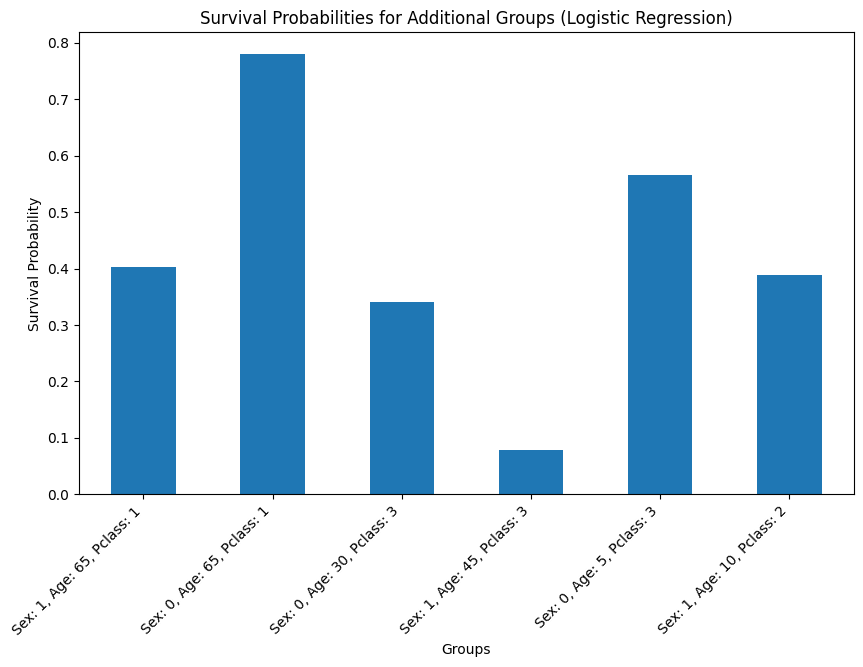

                        Group  Survival Probability
0  Sex: 1, Age: 65, Pclass: 1              0.403411
1  Sex: 0, Age: 65, Pclass: 1              0.779900
2  Sex: 0, Age: 30, Pclass: 3              0.340614
3  Sex: 1, Age: 45, Pclass: 3              0.078685
4   Sex: 0, Age: 5, Pclass: 3              0.565022
5  Sex: 1, Age: 10, Pclass: 2              0.389125


In [17]:
additional_groups['Survival Probability'] = logreg_model.predict_proba(additional_groups[X.columns])[:, 1]
additional_groups.plot(
    kind='bar',
    x='Group',
    y='Survival Probability',
    legend=False,
    figsize=(10, 6),
    title='Survival Probabilities for Additional Groups (Logistic Regression)'
)
plt.ylabel('Survival Probability')
plt.xlabel('Groups')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the predicted probabilities for additional groups
print(additional_groups[['Group', 'Survival Probability']])

**9. Combine and Visualize All Groups**

- Combine all groups into a single DataFrame.
- Plot all survival probabilities together for a comprehensive overview.

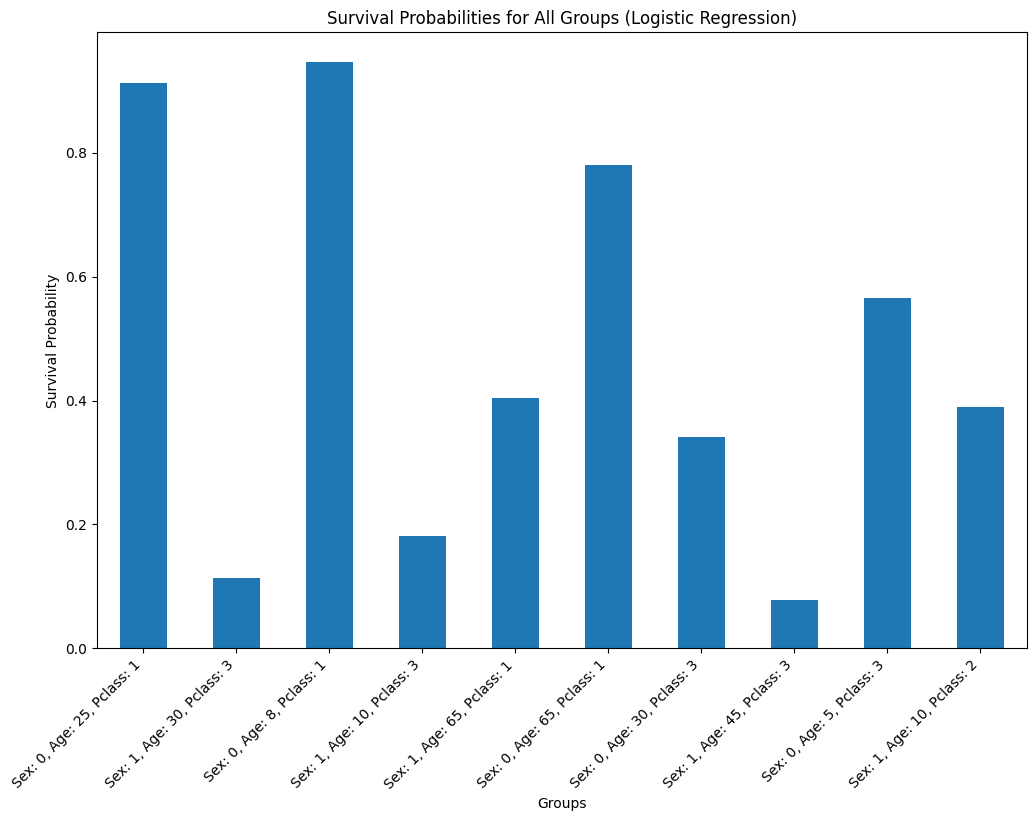

                        Group  Survival Probability
0  Sex: 0, Age: 25, Pclass: 1              0.912198
1  Sex: 1, Age: 30, Pclass: 3              0.114072
2   Sex: 0, Age: 8, Pclass: 1              0.947430
3  Sex: 1, Age: 10, Pclass: 3              0.181951
4  Sex: 1, Age: 65, Pclass: 1              0.403411
5  Sex: 0, Age: 65, Pclass: 1              0.779900
6  Sex: 0, Age: 30, Pclass: 3              0.340614
7  Sex: 1, Age: 45, Pclass: 3              0.078685
8   Sex: 0, Age: 5, Pclass: 3              0.565022
9  Sex: 1, Age: 10, Pclass: 2              0.389125


In [18]:
# Combine all groups for a comprehensive visualization
combined_groups = pd.concat([example_groups, additional_groups], ignore_index=True)

# Plot all survival probabilities together
combined_groups.plot(
    kind='bar',
    x='Group',
    y='Survival Probability',
    legend=False,
    figsize=(12, 8),
    title='Survival Probabilities for All Groups (Logistic Regression)'
)
plt.ylabel('Survival Probability')
plt.xlabel('Groups')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print all groups with their survival probabilities
print(combined_groups[['Group', 'Survival Probability']])